# Logistic Regression in action

## Import Library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Loading Dataset

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=17UFRSkcub7KwKWdE_lFyQLcEA4e8GzG0')

## EDA

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().all()

,0
User ID,False
Gender,False
Age,False
EstimatedSalary,False
Purchased,False


As you can see, we have a perfectly clear dataset.


<ipython-input-7-8a4cae2f6807>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0],x= df['Age'], palette = "Set1")


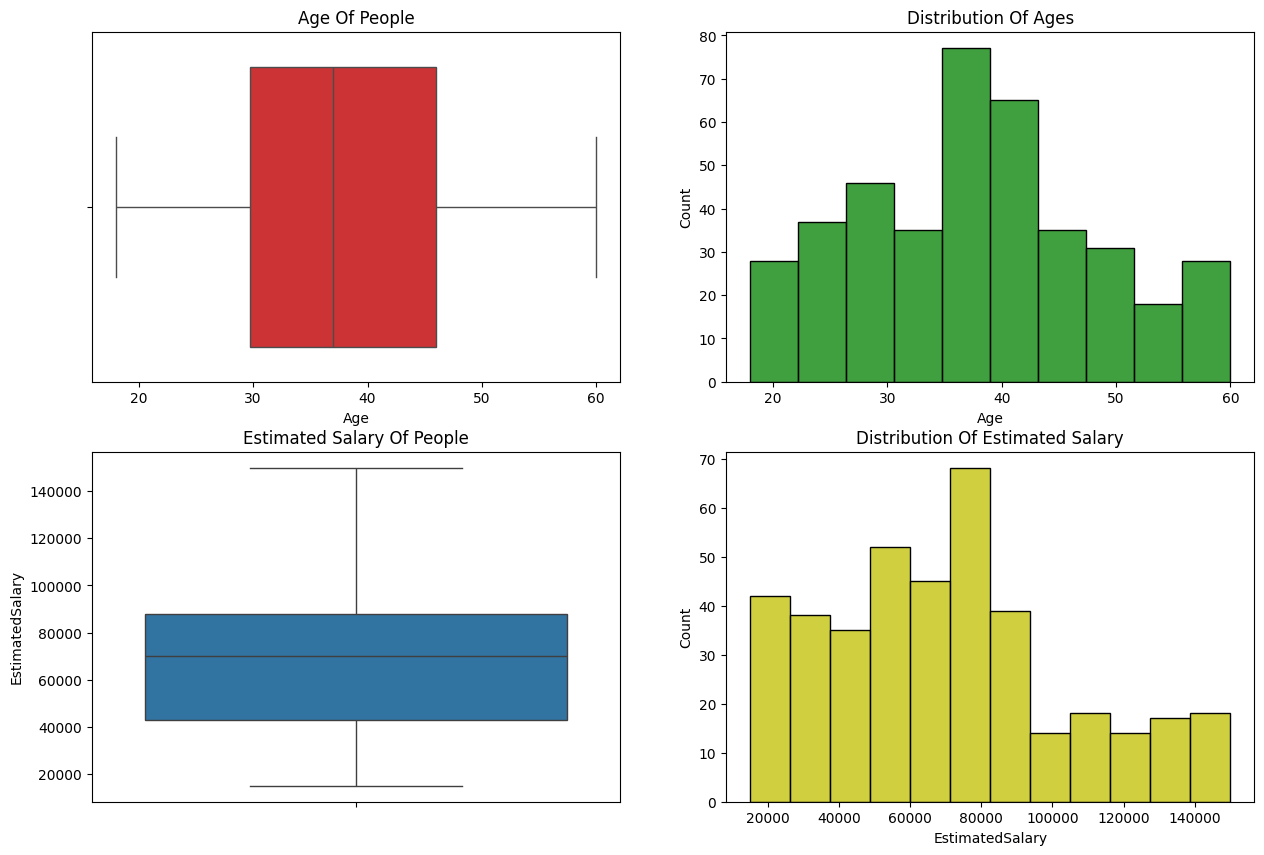

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0],x= df['Age'], palette = "Set1")
axes[0,0].set_title('Age Of People')
sns.histplot(ax=axes[0,1],x='Age',data=df,color="g")
axes[0,1].set_title('Distribution Of Ages')

sns.boxplot(ax=axes[1,0],data = df['EstimatedSalary'])
axes[1,0].set_title('Estimated Salary Of People')
sns.histplot(ax=axes[1,1],x='EstimatedSalary',data=df,color="y")
axes[1,1].set_title('Distribution Of Estimated Salary')
plt.show()

<ipython-input-8-1e153ac9962d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
<ipython-input-8-1e153ac9962d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")


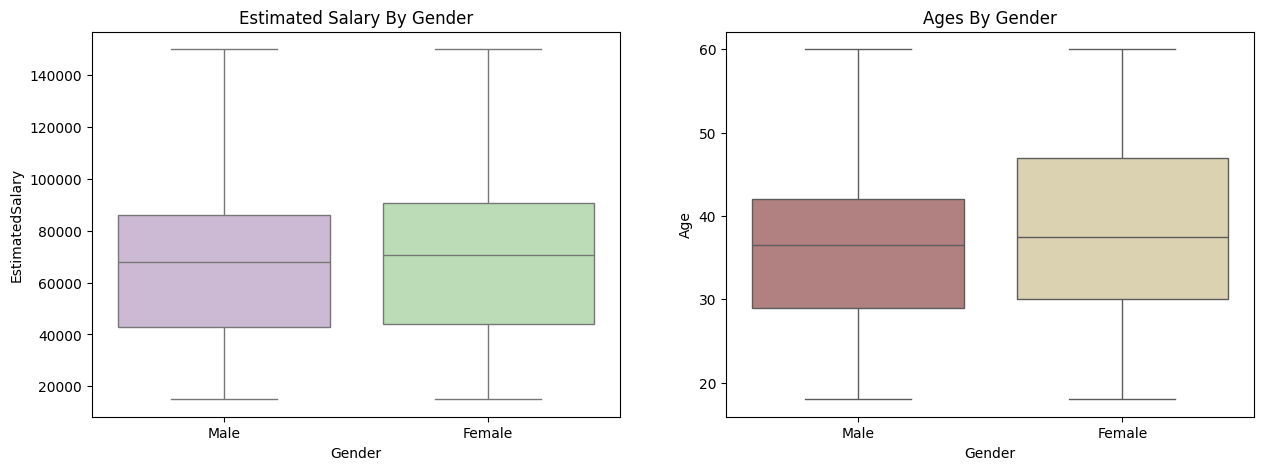

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

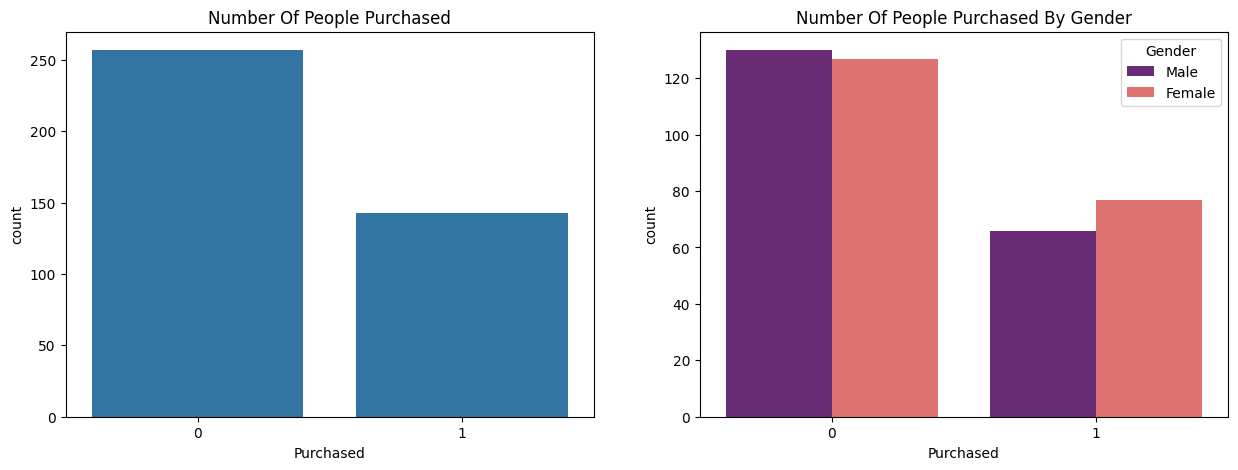

In [ ]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df,palette="magma")
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

In [ ]:
#preparing data
df.drop('User ID',axis = 1, inplace = True)
label = {'Male': 0 ,"Female" : 1}
df['Gender'].replace(label, inplace= True)

<ipython-input-10-0855fad5516f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(label, inplace= True)
<ipython-input-10-0855fad5516f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace(label, inplace= True)


In [ ]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


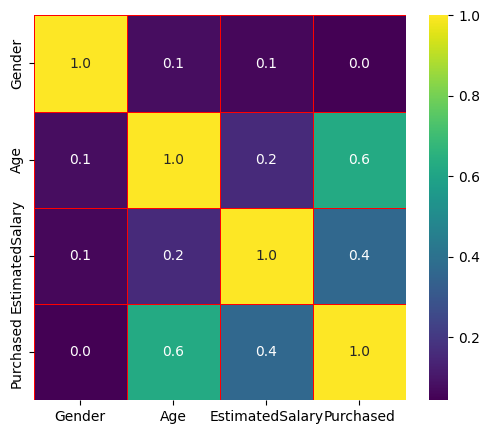

In [ ]:
f,ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

## Preparing data

In [ ]:
# set inputs and outputs
X = df.drop('Purchased',axis = 1)
y = df['Purchased']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(d_scaled,y,test_size=0.2,random_state=42)

## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1,max_iter = 500)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
# y = B + W*x1...

print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

Weight Coefficient : [[-0.0621004   1.39046345  0.79305836]]
Bias : [-0.86853713]


## Evaluation

In [ ]:
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.8625
Train accuracy: 0.8125


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [ ]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'],
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,50,2
Actual Negative,9,19


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.8625
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1 Score: 0.7755102040816326


## [Optional] SMOTE Methode

In [ ]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_resample(X_test, y_test.ravel())

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)
y_pred_res = model.predict(X_test_res)

<ipython-input-22-f01c02fe42f7>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
<ipython-input-22-f01c02fe42f7>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_test_res, y_test_res = sm.fit_resample(X_test, y_test.ravel())


In [ ]:
print(f'Test accuracy {model_res.score(X_test_res,y_test_res)}')

Test accuracy 0.8942307692307693


In [ ]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test_res, y_pred_res), columns = ['Predicted Positive', 'Predicted Negative'],
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,50,2
Actual Negative,20,32


In [ ]:
print(f'Originally: {X_train.shape}')
print(f'With SMOTE: {X_train_res.shape}')

Originally: (320, 3)
With SMOTE: (410, 3)


# Testing a lot of classification models

## Import Library

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, \
                    cross_val_score
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore")

## Loading Dataset

In [ ]:
# Loading csv
initial_df = pd.read_csv('https://drive.google.com/uc?id=1bK-2cex1c52grsOgijhYWajCdJwXRupT')
submission_df = pd.read_csv('https://drive.google.com/uc?id=13bAAy9An6Tqs6l2vx8sALhMYaL8MCWa8')

In [ ]:
initial_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [ ]:
initial_df.shape

(891, 12)

In [ ]:
initial_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
col_names = initial_df.columns

col_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
initial_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
submission_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


### Categorical Features

In [ ]:
categorical = [var for var in initial_df.columns if initial_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
initial_df[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [ ]:
initial_df[categorical].isnull().sum()

,0
Name,0
Sex,0
Ticket,0
Cabin,687
Embarked,2


In [ ]:
cat1 = [var for var in categorical if initial_df[var].isnull().sum()!=0]

print(initial_df[cat1].isnull().sum())

Cabin       687
Embarked      2
dtype: int64


In [ ]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(initial_df[var].unique()), ' labels')

Name  contains  891  labels
Sex  contains  2  labels
Ticket  contains  681  labels
Cabin  contains  148  labels
Embarked  contains  4  labels


In [ ]:
# again view the summary of dataset

initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# preview the dataset again

initial_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Numerical Features

In [ ]:
numerical = [var for var in initial_df.columns if initial_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
initial_df[numerical].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
# check missing values in numerical variables

initial_df[numerical].isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0


In [ ]:
# view summary statistics in numerical variables

print(round(initial_df[numerical].describe()),2)

       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count        891.0     891.0   891.0  891.0  891.0  891.0  891.0
mean         446.0       0.0     2.0   24.0    1.0    0.0   32.0
std          257.0       0.0     1.0   18.0    1.0    1.0   50.0
min            1.0       0.0     1.0    0.0    0.0    0.0    0.0
25%          224.0       0.0     2.0    6.0    0.0    0.0    8.0
50%          446.0       0.0     3.0   24.0    0.0    0.0   14.0
75%          668.0       1.0     3.0   35.0    1.0    0.0   31.0
max          891.0       1.0     3.0   80.0    8.0    6.0  512.0 2


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [ ]:
# One hot encoding categorical features
initial_with_dummies_df = pd.get_dummies(initial_df[features + ['Survived']])
submission_with_dummies_df = pd.get_dummies(submission_df[features])

In [ ]:
initial_with_dummies_df = pd.get_dummies(initial_df[features + ['Survived']])
submission_with_dummies_df = pd.get_dummies(submission_df[features])

### Define Target

In [ ]:
X = initial_with_dummies_df.drop(['Survived'], axis=1).values
y = initial_with_dummies_df['Survived'].values
X_submission = submission_with_dummies_df.values

In [ ]:
X

array([[3, 22.0, 1, ..., False, False, True],
       [1, 38.0, 1, ..., True, False, False],
       [3, 26.0, 0, ..., False, False, True],
       ...,
       [3, 0.0, 1, ..., False, False, True],
       [1, 26.0, 0, ..., True, False, False],
       [3, 32.0, 0, ..., False, True, False]], dtype=object)

In [ ]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

# Data preproccesing - Divining Data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=1)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 10), (223, 10), (668,), (223,))

## Model Training

In [ ]:
# Setup default parameters
estimator = RandomForestClassifier(random_state=1).fit(X_train, y_train)
estimator_kn = LogisticRegression().fit(X_train, y_train)
estimators = [('rf', estimator),
              ('kn', estimator_kn)]
param_grid = {"max_depth": [3, None], "min_samples_split": [5, 10]}

model_names = [
    'AdaBoostClassifier',
    'BaggingClassifier',
    'BernoulliNB',
    'CalibratedClassifierCV',
    ('CategoricalNB', '(min_categories=75)'),
    ('ClassifierChain', f'(base_estimator={estimator_kn})'),
    'ComplementNB',
    'DecisionTreeClassifier',
    ('DummyClassifier', '(strategy="most_frequent", random_state=1)'),
    'ExtraTreeClassifier',
    'ExtraTreesClassifier',
    'GaussianNB',
    'GaussianProcessClassifier',
    'GradientBoostingClassifier',
    'HistGradientBoostingClassifier',
    'KNeighborsClassifier',
    'LabelPropagation',
    'LabelSpreading',
    'LinearDiscriminantAnalysis',
    'LinearSVC',
    'LogisticRegression',
    'LogisticRegressionCV',
    'MLPClassifier',
    ('MultiOutputClassifier', f'(estimator={estimator})'),
    'MultinomialNB',
    'NearestCentroid',
    'NuSVC',
    ('OneVsOneClassifier', f'(estimator={estimator})'),
    ('OneVsRestClassifier', f'(estimator={estimator})'),
    ('OutputCodeClassifier', f'(estimator={estimator})'),
    'PassiveAggressiveClassifier',
    ('Perceptron', '(shuffle=False, random_state=1)'),
    'QuadraticDiscriminantAnalysis',
    ('RadiusNeighborsClassifier', '(radius=50)'),
    'RandomForestClassifier',
    'RidgeClassifier',
    'RidgeClassifierCV',
    'SGDClassifier',
    'SVC',
    ('StackingClassifier', f'(estimators={estimators})'),
    ('VotingClassifier', f'(estimators={estimators})'),
]

In [ ]:
# Useful functions for processing all models
def model_score(model_name, save_to_csv=False):
    model = None
    name = model_name
    if type(model_name) is tuple:
        model = eval(model_name[0] + model_name[1])
        name = str(model).split('(')[0]
    else:
        try:
            model = eval(model_name + '(random_state=1)')
        except:
            model = eval(model_name + '()')

    if name == 'ClassifierChain' or name == 'MultiOutputClassifier':
        return model_scores_special(model, save_to_csv=save_to_csv)

    model.fit(X_train, y_train)

    y_final = model.predict(X_submission)
    final_df = pd.DataFrame({'PassengerId': submission_df['PassengerId'], 'Survived': y_final})
    if save_to_csv:
        final_df.to_csv(f'{name}.csv', index=False)

    cv_test = cross_val_score(model, X_test, y_test, cv=5).mean()
    model_score = model.score(X_test, y_test)
    return [name, cv_test, model_score]


def model_scores_special(model, save_to_csv=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    model.fit(X_train, y_train)

    # Calculate model scores
    y_final = model.predict(X_submission)
    y_final = np.concatenate(y_final).astype(int)
    y_final = y_final.reshape(y_final.shape[0],)

    final_df = pd.DataFrame({'PassengerId': submission_df['PassengerId'], 'Survived': y_final})
    cv_test = cross_val_score(model, X_test, y_test, cv=5).mean()
    model_score = model.score(X_test, y_test)
    name = str(model).split('(')[0]

    if save_to_csv:
        final_df.to_csv(f'{name}.csv', index=False)

    return [name, cv_test, model_score]

Cross Validation

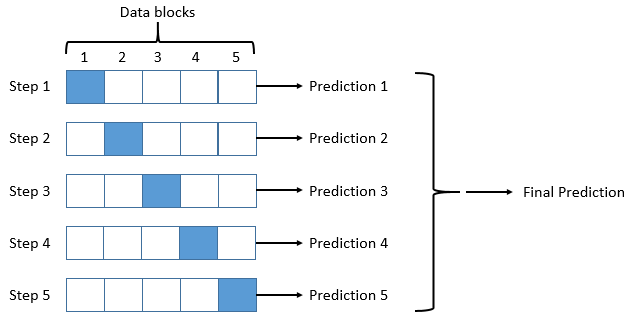

In [ ]:
models_scores = [model_score(name) for name in model_names]

models_scores_df = pd.DataFrame(np.array(models_scores), columns=['Model', 'Cross_Validation', 'Accuracy'])
models_scores_df.sort_values(['Cross_Validation', 'Accuracy'], ascending=False, inplace=True)
models_scores_df = models_scores_df.set_index('Model')

## Evaluation

In [ ]:
models_scores_df['Real_Score'] = [0.76076, 0.77511, 0.77511, 0.77511, 0.77511, 0.77511, 0.77751,
                                  0.77751, 0.72966, 0.76315, 0.78229, 0.76555, 0.74401, 0.77033,
                                  0.76794, 0.76794, 0.76794, 0.76794, 0.76794, 0.76076, 0.76555,
                                  0.77033, 0.74641, 0.70574, 0.63636, 0.70095, 0.66985, 0.74641,
                                  0.6244 , 0.63397, 0.65789, 0.66507, 0.6555 , 0.66267, 0.62679,
                                  0.65311, 0.64832, 0.61483, 0.61483, 0.61961, 0.622]

models_scores_df

,Cross_Validation,Accuracy,Real_Score
Model,,,
CalibratedClassifierCV,0.8206060606060607,0.8116591928251121,0.76076
BaggingClassifier,0.8117171717171716,0.8251121076233184,0.77511
LinearSVC,0.8116161616161616,0.7937219730941704,0.77511
GradientBoostingClassifier,0.8071717171717172,0.8340807174887892,0.77511
LogisticRegressionCV,0.807070707070707,0.8251121076233184,0.77511
LinearDiscriminantAnalysis,0.807070707070707,0.7937219730941704,0.77511
RidgeClassifier,0.807070707070707,0.7937219730941704,0.77751
RidgeClassifierCV,0.8026262626262627,0.7937219730941704,0.77751
ClassifierChain,0.8025252525252526,0.8161434977578476,0.72966


In [ ]:
models_scores_df = models_scores_df.astype(float)

In [ ]:
models_scores_df['diff_acc'] = models_scores_df['Accuracy'] - models_scores_df['Real_Score']
models_scores_df['diff_CV'] = models_scores_df['Cross_Validation'] - models_scores_df['Real_Score']
models_scores_df

,Cross_Validation,Accuracy,Real_Score,diff_acc,diff_CV
Model,,,,,
CalibratedClassifierCV,0.820606,0.811659,0.76076,0.050899,0.059846
BaggingClassifier,0.811717,0.825112,0.77511,0.050002,0.036607
LinearSVC,0.811616,0.793722,0.77511,0.018612,0.036506
GradientBoostingClassifier,0.807172,0.834081,0.77511,0.058971,0.032062
LogisticRegressionCV,0.807071,0.825112,0.77511,0.050002,0.031961
LinearDiscriminantAnalysis,0.807071,0.793722,0.77511,0.018612,0.031961
RidgeClassifier,0.807071,0.793722,0.77751,0.016212,0.029561
RidgeClassifierCV,0.802626,0.793722,0.77751,0.016212,0.025116
ClassifierChain,0.802525,0.816143,0.72966,0.086483,0.072865
